# Problem Set 5: Filtering / smoothing and plotting

In this problem set, you're going to write 3 versions of a data-smoothing algorithm:

```
SlidingFilt3_loop()
SlidingFilt3()
TentFilt3()
```

You'll notice that in the starter code below, I've not only got placeholders for these functions (complete with exact descriptions of what they do), but that I've written some amount of helper functions for you. These will serve as templates for later assignments but here, they will do the following:

The first cell has the routines you'll write:

`LoadData()`: Loads up some data I made that you can use here and that we'll use later (this is what needs Filter1_data.npz).

`TestFiltSpeed()`: Just how long do your routines take? Run this when you've got the two versions of SlidingFilt3 up and working.

`ShowSimplePlot()`: Calls on matplotlib to make a basic pre- and post-filtered plot. Uses the data from LoadData by default. Run this once you have SlidingFilt3 working.

The second cell has some tests you can run.

You'll know things are at least mostly working when you can say something like:
`SlidingFilt3(test_data)`

and it should output:

`array([ 3. , 3., 5. , 6.33333333, 8. ])`


The tent version should give:
`array([ 2.33333333, 3.5 , 4.5 , 6.5 , 8.33333333])`

Details on the functions you're to write are in their docstrings.  So, get coding and as you write new bits, un-comment the tests in the second cell.  In the end, you should have an output that looks like this:

![sample output](https://github.com/celstark/n247data/raw/main/data/SimplePlot_PSet_output.png)


In [35]:
import numpy as np


def SlidingFilt3_loop (data):
    """
    Computes a sliding-window average of a 1D array (vector)
    using a 3-wide window.  Each value on the output is the mean
    of the current value, the one before this, and the one after
    this.  Return the resulting array.
    
    You'll note that for the ends, you don't have either the
    'before' or 'after' element.  Handle this by using the data
    you do have at hand.
    
    Input should be an np.array, have only 1 dimension, and be
    at least 2 elements long.  If not, raise reasonable errors.
    
    NOTE: In this version, you must use a loop to iterate over 
    the data and compute the means.    
    """    
    if type(data) != np.ndarray:
        raise TypeError("Input must be an np.array!")
    
    if data.ndim != 1: 
        raise ValueError("Input must be one-dimensional!")
    
    if len(data) < 2: 
        raise ValueError("Inout must be at least 2 elements long!")


    means_list = []
    for i in range(len(data)):
        if i == -1: #last element 
            window = data[i-1:i+1]
        elif i ==0: #first element
            window = data[i:i+2]
        else: #middle elements 
            window = data[i-1:i+2]
       
        mean_val = np.mean(window)
        means_list.append(mean_val)

    
    return np.array(means_list)



def SlidingFilt3 (data):
    
    """
    Computes a sliding-window average of a 1D array (vector)
    using a 3-wide window.  Each value on the output is the mean
    of the current value, the one before this, and the one after
    this.  Return the resulting array.
    
    You'll note that for the ends, you don't have either the
    'before' or 'after' element.  Handle this by using the data
    you do have at hand.
    
    Input should be an np.array, have only 1 dimension, and be
    at least 2 elements long.  If not, raise reasonable errors.

    NOTE: In this version, you may not use a loop of any kind.
    You must use vectorized math, but you may not use any built-
    in NumPy or SciPy filtering routines.  Think about shifting
    the data left and shifting it right.    

    """    
    if type(data) != np.ndarray:
        raise TypeError("Input must be an np.array!")
    
    if data.ndim != 1: 
        raise ValueError("Input must be one-dimensional!")
    
    if len(data) < 2: 
        raise ValueError("Inout must be at least 2 elements long!")

    new = np.empty(len(data), dtype=float)
    
    left = np.concatenate(([data[0]], data[:-1]))
    right = np.concatenate((data[1:], [data[-1]]))

    new[0] = (right[0] + data[0]) / 2 #first element
    new[1:-1] = (left[1:-1] + data[1:-1] + right[1:-1]) / 3 #middle elements
    new[-1] = (left[-1] + data[-1]) / 2 #last element
   
    return new



def TentFilt3(data):
    """
    Take your solution for SlidingFilt3 and modify it.  It will
    again be doing a 3-wide window, computing the mean, etc.
    This time, however, you are going to weigh the current value
    twice as much as the values to the left and right. Instead 
    of each one getting the same vote on the final value, the 
    before and after ones get half the vote that the middle one
    gets.

    For example, the 4th slot in your output array would be the
    average of data[4], data[4], data[3] and data[5]
    
    """
    if type(data) != np.ndarray:
        raise TypeError("Input must be an np.array!")
        
    if data.ndim != 1: 
        raise ValueError("Input must be one-dimensional!")
        
    if len(data) < 2: 
        raise ValueError("Inout must be at least 2 elements long!")
    
    new = np.empty(len(data), dtype=float)

    left = np.concatenate(([data[0]], data[:-1]))
    right = np.concatenate((data[1:], [data[-1]]))
    center = data

    #weigh current value twice as much as the values to the left and right
    new[0] = (right[0] + center[0]*2) / 3
    new[1:-1] = (left[1:-1] + center[1:-1]*2 + right[1:-1]) / 4
    new[-1] = (left[-1] + center[-1]*2) / 3

    return new

def TestFiltSpeed(n=1000000):
    """
    This is a routine I wrote to let you see how fast your 
    two solutions run.
    
    If you'd like, just type:
    TestFiltSpeed()
    
    and optionally pass in a number of elements to work on.
    You'll see just how long it takes to run.
    """
    import timeit
    
    data = np.random.rand(n)
    t=timeit.timeit(lambda: SlidingFilt3_loop(data),number=1)
    print('Loop speed for {0:,} items is {1:.3f}'.format(n,t))    
    t=timeit.timeit(lambda: SlidingFilt3(data),number=1)
    print('Vector speed for {0:,} items is {1:.3f}'.format(n,t))    
    
def LoadData():
    """
    This is a routine I've already written for you that will
    load up two 1D arrays of data that I created for you to 
    play with.
    
    These arrays, 'data' and 'data2' should be available for
    you after this LoadData() has been run as they're set to 
    be globals
    """
    global sampledata, sampledata2
    
    # Since we're loading this data off of the web, we need a few bits...
    import requests, io

    fname='https://github.com/celstark/n247data/raw/main/data/Filter1_data.npz'
    # This would also work
    #fname='https://raw.githubusercontent.com/celstark/n247data/main/data/Filter1_data.npz'
    response = requests.get(fname)
    response.raise_for_status()
    d=np.load(io.BytesIO(response.content))
    
    sampledata = d['data']
    sampledata2 = d['data2']

def ShowSimplePlot(data=0):
    """
    This is another helper routine I've made for you to let you
    see the effect of your filter.  It will use the data found
    in the global 'sampledata' by default, but you can pass
    in anything you like
    """
    global sampledata
    from matplotlib import pyplot as plt
    
    if type(data)==int and data==0:
        data = sampledata
        
    x=np.arange(len(data))
    plt.plot(x,data,x,SlidingFilt3(data))

[3.         3.         5.         6.33333333 8.        ]
[3.         3.         5.         6.33333333 8.        ]
[2.33333333 3.5        4.5        6.5        8.33333333]


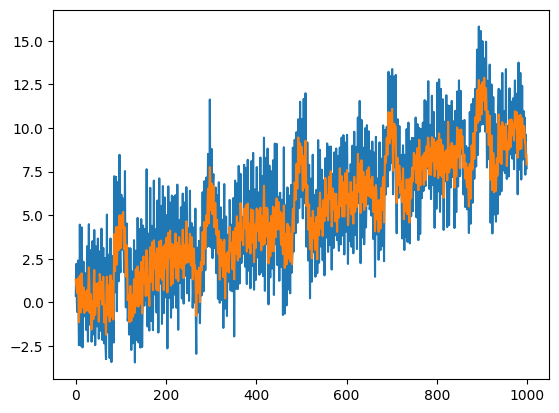

In [36]:
# Load up my sample data
LoadData()

# Make a simple test bit of data for us
test_data = np.array([1.0, 5, 3, 7, 9])

# Un-commment these as you write the functions to test them
print(SlidingFilt3_loop(test_data))
print(SlidingFilt3(test_data))
print(TentFilt3(test_data))

ShowSimplePlot()